_______________________________________________________________________________
***Progetto Data Mining***

# About Dataset

## Content
Questo dataset contiene circa 10 anni di osservazioni meteo gornaliere da tutta l'Australia. Contiene in particolare dati sulle giornate di pioggia e di sole di tutto il paese. Contiene 23 colonne.

* Date: la data dell'osservazione
* Location: il luogo della stazione meteo
* MinTemp: temperatura minima
* MaxTemp: temperatura massima
* Rainfall: il quantitativo di pioggia caduta registrata in mm
* Evaporation: Dato sull'evaporazione in mm
* Sunshine: Numero di ore di luce nel giorno
* WindGustDir: Direzione della folata di vento più forte
* WindGustSpeed: Velocità della folata di vento più forte
* WindGust3Dir: Direzione del vento alle 3
* WindGust9Dir: Direzione del vento alle 9
* WindSpeed9am: Velocità del vento alle 9
* WindSpeed3am: Velocità del vento alle 3
* Humidity3pm: Umidità alle 3
* Humidity9pm: Umidità alle 9
* Pressure9am: Pressione atmosferica alle 9
* Pressure3pm: Pressione atmosferica alle 3
* Cloud9am: Porzione di cielo oscurata dalle nuvole calcolata in "oktas" alle 9
* Cloud3pm:Porzione di cielo oscurata dalle nuvole calcolata in "oktas" alle 3
* Temp9am: Temperatura alle 9
* Temp3pm: Temperatura alle 3
* RainToday: Boolean: 1 se pioverà oggi con una quantità maggiore a 1mm di acqua, 0 altrimenti
* RainTomorrow: Boolean: 1 se pioverà domani con una quantità maggiore a 1mm di acqua, 0 altrimenti



In [52]:
from pandas import DataFrame, Series
from io import StringIO
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image
import seaborn as sb
import statistics as stat
import time
import math
from sklearn.metrics import *

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE


In [54]:
def describe(a):
    if type(a) is np.ndarray:
        print("data:\n{}\nshape:{}\ndtype:{}\ntype: {}".format(a, a.shape, a.dtype, type(a)))
    elif type(a) is pd.Series:
        print("data:\n{}\nshape:{}\ndtype:{}\nname:{}\nindex-name:{}\ntype:{}".format(a, a.shape, a.dtype, a.name, a.index.name, type(a)))
    elif type(a) is pd.DataFrame:
        print("data:\n{}\nshape:{}\ntype:{}".format(a, a.shape,type(a)))
    else:
        print("{}, type:{}".format(a, type(a)))

# Informazioni di base e data visualization

In [55]:
dataFrameWeather = pd.read_csv('./content/drive/MyDrive/weatherAUS.csv')

In [56]:
dataFrameWeather.shape

(145460, 23)

In [57]:
dataFrameWeather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [58]:
dataFrameWeather.duplicated().value_counts()

False    145460
dtype: int64

In [59]:
dataFrameWeather.sample(frac=1).head(30)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
83221,2015-05-02,Dartmoor,12.2,18.3,1.0,2.2,5.4,WNW,56.0,NNW,...,NaN,NaN,1015.2,1014.3,NaN,NaN,14.7,18.0,No,Yes
117563,2017-04-21,PearceRAAF,10.8,30.2,0.0,NaN,10.0,NaN,NaN,NE,...,58.0,29.0,1020.0,1016.6,NaN,1.0,21.9,29.2,No,NaN
9320,2009-09-20,CoffsHarbour,12.8,25.9,0.0,5.0,11.2,SSW,31.0,SW,...,36.0,50.0,1015.6,1012.5,1.0,4.0,24.3,23.4,No,No
29429,2015-06-10,Richmond,6.3,14.2,0.0,NaN,NaN,SSW,22.0,SW,...,87.0,78.0,1031.5,1031.5,8.0,8.0,10.3,13.9,No,Yes
81565,2010-07-22,Dartmoor,4.8,14.4,1.8,1.4,5.0,SSE,24.0,NaN,...,99.0,79.0,1034.5,1033.9,NaN,NaN,10.2,13.4,Yes,No
95368,2014-11-17,Townsville,24.1,31.8,0.0,10.0,12.4,NE,31.0,NW,...,58.0,34.0,1013.3,1009.9,4.0,1.0,27.4,31.4,No,No
65812,2013-09-07,MelbourneAirport,7.1,18.4,0.0,2.2,5.8,SW,46.0,WNW,...,69.0,74.0,1025.3,1024.7,7.0,7.0,11.7,13.7,No,No
20413,2015-07-21,NorahHead,10.8,19.3,2.0,NaN,NaN,N,52.0,NW,...,85.0,72.0,1032.9,1029.6,NaN,NaN,14.2,17.0,Yes,No
14896,2016-12-28,Moree,20.7,35.0,0.0,NaN,NaN,NNE,48.0,NNE,...,55.0,24.0,1014.5,1010.0,NaN,NaN,24.6,32.3,No,No
74287,2015-08-03,Nhil,6.5,11.5,0.4,NaN,NaN,S,52.0,WSW,...,100.0,62.0,1020.9,1022.4,NaN,NaN,8.3,10.1,No,No


In [60]:
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Come possiamo notare il dataframe non presenta dati duplicati ma presenta molti dati NaN che andranno gestiti. SI inizia trattando i valori di temperatura minima e massima. Questi possono essere semplicemente essere riempiti con i dati di temperatura media della rispettiva colonna in quanto non presentano un elevato numero di tuple nulle.

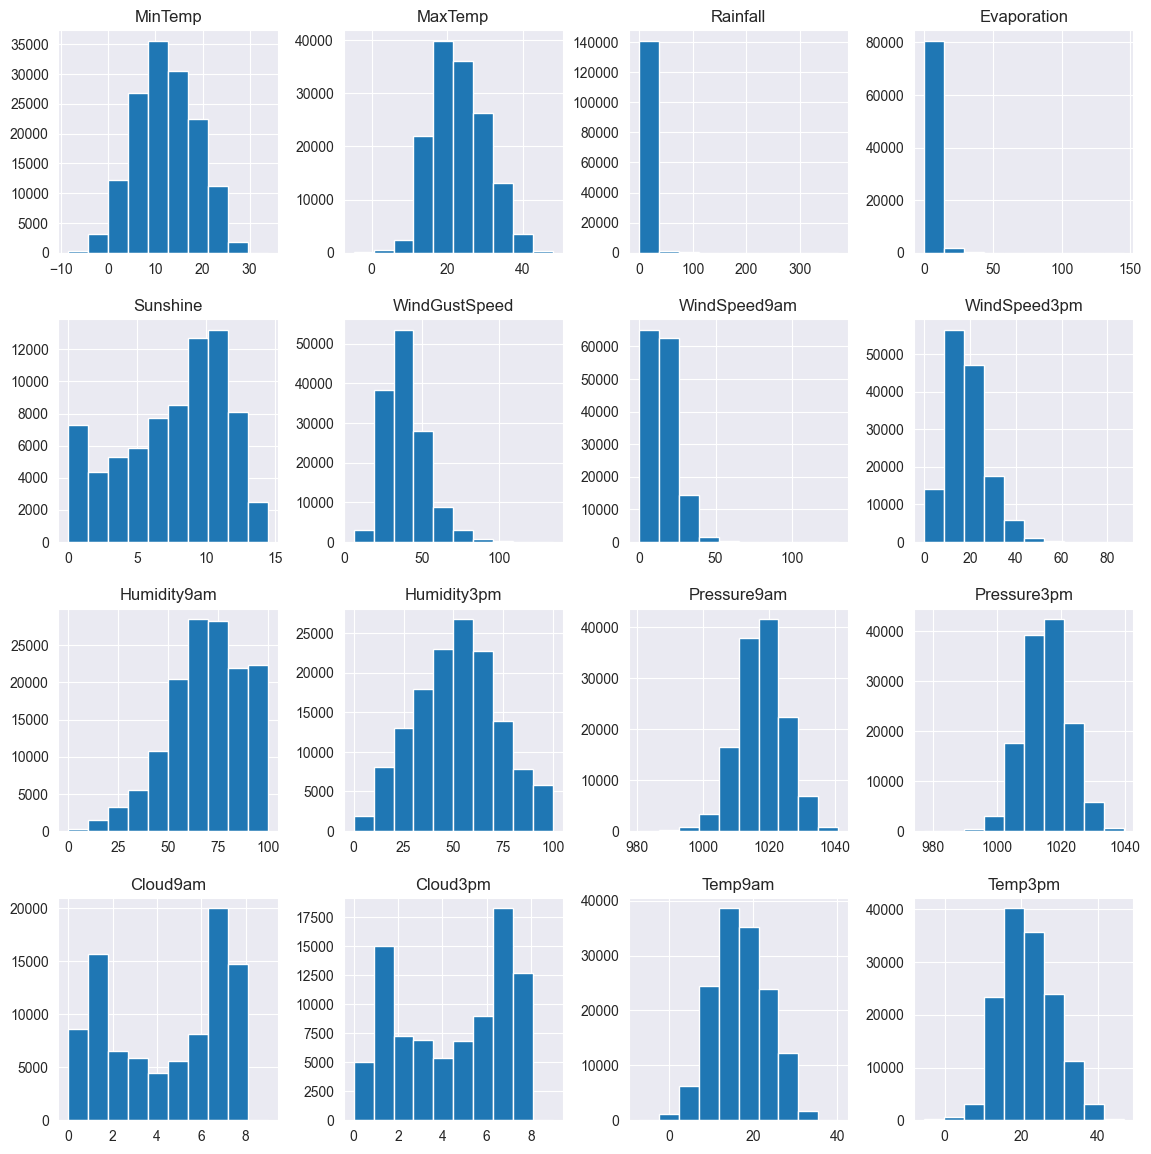

In [61]:
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10, 10))
dataFrameWeather.hist(ax=ax)
plt.subplots_adjust(right=1.2, top=1.2)
plt.show()

# Data cleaning e Pre-processing

Inizio con il riempimento dei dati nan. Parto con 'MinTemp' e 'MaxTemp'. Essendo pochi i dati mancanti, essi verranno sostituiti con la temperatura media di ciascuna colonna.

In [62]:
mean_MinTemp = dataFrameWeather['MinTemp'].mean()
mean_MaxTemp = dataFrameWeather['MaxTemp'].mean()

dataFrameWeather['MinTemp'].fillna(mean_MinTemp, inplace=True)
dataFrameWeather['MaxTemp'].fillna(mean_MaxTemp, inplace=True)

In [63]:
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Andiamo ora a gestire il dato Rainfall. Esso indica se la quantità di acqua caduta in un giorno 'RainToday' = 'Yes' se e solo se la quantità di acqua caduta è strettamente maggiore di 1mm di acqua.

Si decide di droppare le tuple che contengono valori NaN in quanto la correzione richiederebbe troppo tempo per essere implementata visto il numero esiguo di tuple

Si decide di droppare le colonne 'WindDir3pm' and 'WindDir9pm' perchè risultano essere irrilevanti ed essere una specifica di una colonna già esistente. Stessa cosa con 'WindSpeed9am', 'WinSpeed3pm'

In [64]:
dataFrameWeather = dataFrameWeather.drop(columns=['WindDir3pm', 'WindDir9am', 'WindSpeed3pm', 'WindSpeed9am'], axis=1)
dataFrameWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   Humidity9am    142806 non-null  float64
 10  Humidity3pm    140953 non-null  float64
 11  Pressure9am    130395 non-null  float64
 12  Pressure3pm    130432 non-null  float64
 13  Cloud9am       89572 non-null   float64
 14  Cloud3pm       86102 non-null   float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

Posso, inoltre, droppare le tuple mancanti nella colonna 'RainTomorrow' essendo di un numero molto esiguo ed essendo questo il parametro che vogliamo andare a predire

In [65]:
dataFrameWeather.dropna(subset='Rainfall', inplace=True)
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      60488
Sunshine         67820
WindGustDir       9725
WindGustSpeed     9665
Humidity9am       1554
Humidity3pm       3630
Pressure9am      13940
Pressure3pm      13993
Cloud9am         53331
Cloud3pm         56874
Temp9am            685
Temp3pm           2746
RainToday            0
RainTomorrow      1412
dtype: int64

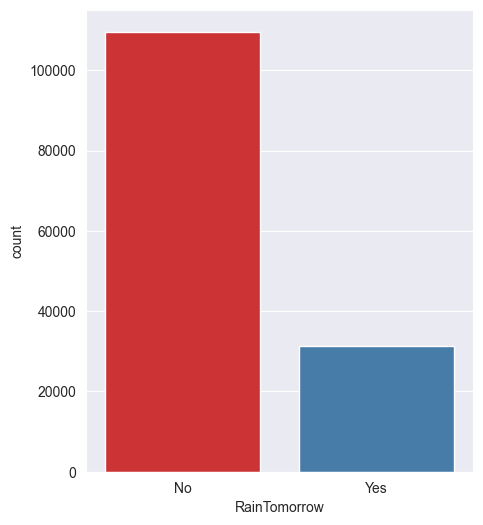

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   Humidity9am    139270 non-null  float64
 10  Humidity3pm    137286 non-null  float64
 11  Pressure9am    127044 non-null  float64
 12  Pressure3pm    127018 non-null  float64
 13  Cloud9am       88162 non-null   float64
 14  Cloud3pm       84693 non-null   float64
 15  Temp9am        140131 non-null  float64
 16  Temp3pm        138163 non-null  float64
 17  RainToday      140787 non-nul

In [66]:
dataFrameWeather.dropna(subset='RainTomorrow', inplace=True)
plt.figure(figsize=(5,6))
ax = sb.countplot(x='RainTomorrow', data=dataFrameWeather, palette="Set1")
plt.show()
dataFrameWeather.info()

Si continua con la sostituizione ai valori nan delle colonne 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm'. Qui si andrà ad effettuare una group-by sull'attributo 'RainToday', così da poter differenziare la media calcolata per giorni in cui piove e per giorni in cui non piove.

In [67]:
average_humidity = dataFrameWeather.groupby('RainToday')['Humidity9am'].transform('mean')
average_humidity2 = dataFrameWeather.groupby('RainToday')['Humidity3pm'].transform('mean')
average_temp = dataFrameWeather.groupby('RainToday')['Temp9am'].transform('mean')
average_temp2 = dataFrameWeather.groupby('RainToday')['Temp3pm'].transform('mean')
dataFrameWeather['Humidity9am'].fillna(average_humidity, inplace=True)
dataFrameWeather['Humidity3pm'].fillna(average_humidity2, inplace=True)
dataFrameWeather['Temp9am'].fillna(average_temp, inplace=True)
dataFrameWeather['Temp3pm'].fillna(average_temp2, inplace=True)

In [68]:
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
Humidity9am          0
Humidity3pm          0
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

Text(0, 0.5, 'RainTomorrow')

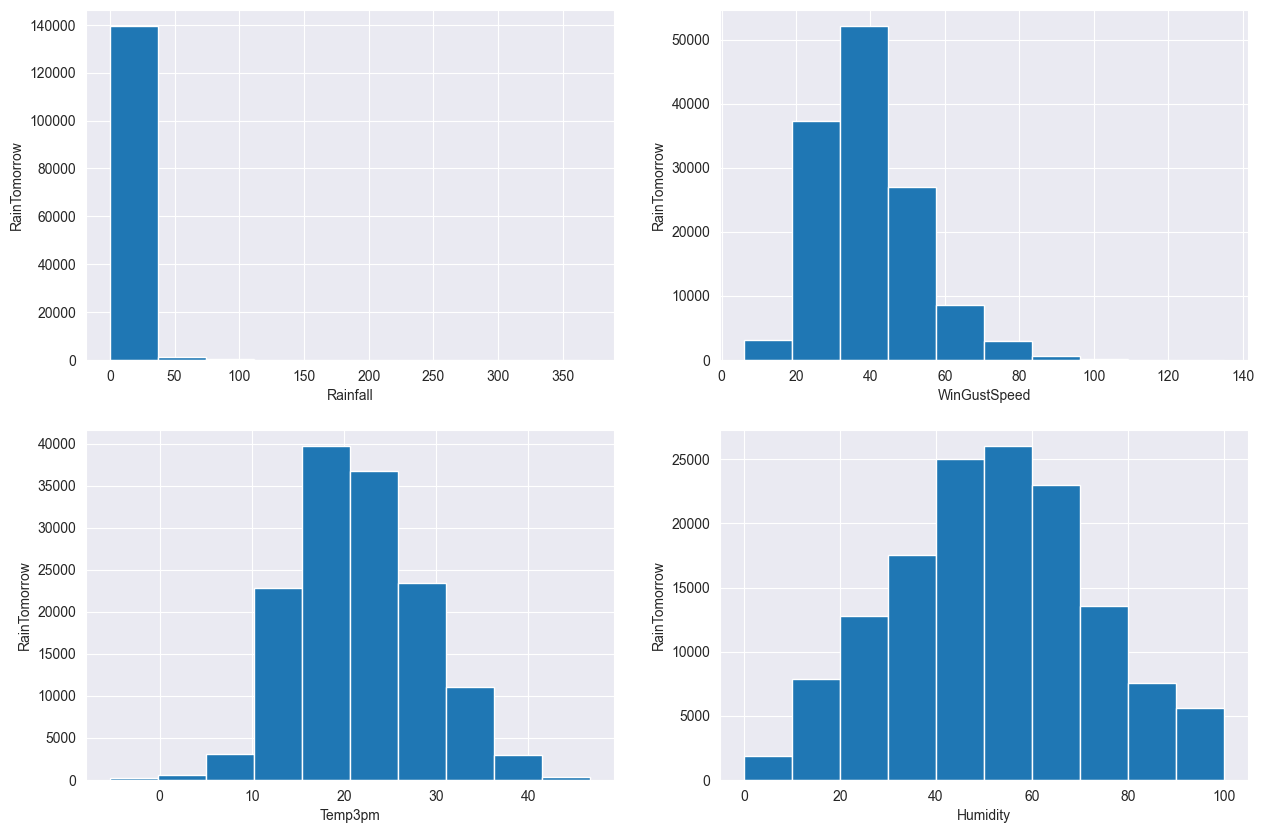

In [69]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = dataFrameWeather.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = dataFrameWeather.WindGustSpeed.hist(bins=10)
fig.set_xlabel('WinGustSpeed')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = dataFrameWeather.Temp3pm.hist(bins=10)
fig.set_xlabel('Temp3pm')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = dataFrameWeather.Humidity3pm.hist(bins=10)
fig.set_xlabel('Humidity')
fig.set_ylabel('RainTomorrow')

Si decide di droppare le colonne Evaporation e Sunshine in quanto sono quelle con la più bassa correlazione con gli altri attributi

In [70]:
dataFrameWeather = dataFrameWeather.drop(columns=['Evaporation', 'Sunshine'], axis=1)
dataFrameWeather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    131624 non-null  object 
 6   WindGustSpeed  131682 non-null  float64
 7   Humidity9am    140787 non-null  float64
 8   Humidity3pm    140787 non-null  float64
 9   Pressure9am    127044 non-null  float64
 10  Pressure3pm    127018 non-null  float64
 11  Cloud9am       88162 non-null   float64
 12  Cloud3pm       84693 non-null   float64
 13  Temp9am        140787 non-null  float64
 14  Temp3pm        140787 non-null  float64
 15  RainToday      140787 non-null  object 
 16  RainTomorrow   140787 non-null  object 
dtypes: float64(12), object(5)
mem

In [71]:
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       9163
WindGustSpeed     9105
Humidity9am          0
Humidity3pm          0
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

Trasformo, a questo punto, la data dal formato gg-mm-aaaa in tre colonne diverse contenenti il giorno, il mese e l'anno. Questa soluzione sarà utile in seguito per fare imputation

In [72]:
df_copy = dataFrameWeather.copy()
# Aggiungo la colonna "month" al dataframe
df_copy['day'] = df_copy.Date.str.split("-", expand = True)[0]
df_copy['month'] = df_copy.Date.str.split("-", expand = True)[1]
# Aggiungo la colonna "year" al dataframe
df_copy['year'] = df_copy.Date.str.split("-", expand = True)[2]
df_copy = df_copy.drop(columns='Date', axis=1)

In [73]:
df_copy.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       9163
WindGustSpeed     9105
Humidity9am          0
Humidity3pm          0
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
day                  0
month                0
year                 0
dtype: int64

In [74]:
df_num = df_copy.select_dtypes(include=[np.number])
df_cat = df_copy.select_dtypes(include=['object'])

Uso un encoder per trasformare i dati categorici in dati numerici automaticamente

In [75]:
df_encoded = pd.concat([df_cat, df_num], axis=1)
for attr in df_encoded.columns:
    df_encoded[attr] = LabelEncoder().fit_transform(df_encoded[attr])
df_encoded.head()

,Location,WindGustDir,RainToday,RainTomorrow,day,month,year,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2,13,0,0,1,11,0,214,260,6,21,72,22,214,231,8,10,224,262
1,2,14,0,0,1,11,1,153,283,0,21,44,25,243,238,10,10,227,288
2,2,15,0,0,1,11,2,209,289,0,22,38,30,213,247,10,2,266,277
3,2,4,0,0,1,11,3,171,312,0,10,45,16,313,289,10,10,237,310
4,2,13,0,0,1,11,4,255,355,10,19,84,33,245,220,7,8,234,342


Data l'elevato numero di tuple nan rimanenti nelle colonne si è deciso di utilizzare un **imputer**. Un **imputer** è una tecnica utilizzata nella fase di preprocessing dei dati per gestire i valori mancanti in un dataset. L'imputer viene utilizzato per riempire i valori mancanti con valori appropriati in base alle caratteristiche dei dati.

In [77]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df_imputed = imputer.fit_transform(df_encoded) #imputation dei valori mancanti
df_imputed = pd.DataFrame(df_encoded, columns=df_copy.columns) #conversione in dataframe pandas
df_imputed.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
day              0
month            0
year             0
dtype: int64

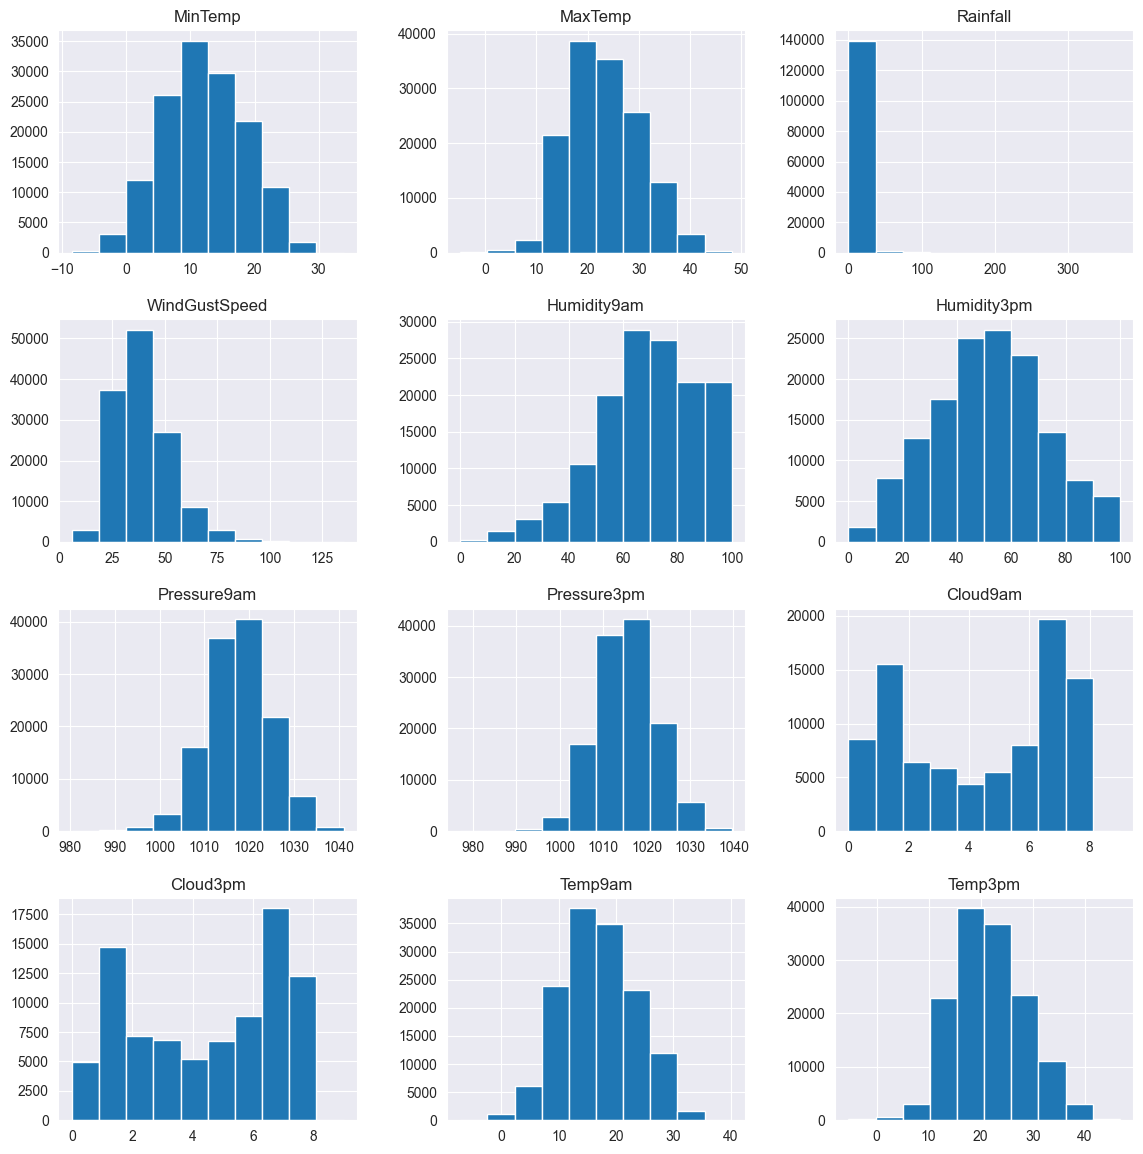

In [78]:
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10, 10))
dataFrameWeather.hist(ax=ax)
plt.subplots_adjust(right=1.2, top=1.2)
plt.show()

# Correlazione e importanza delle features
Plotto la matrice di correlazione servendoci di una heatmap per capire il grado di correlazione tra i vari dati

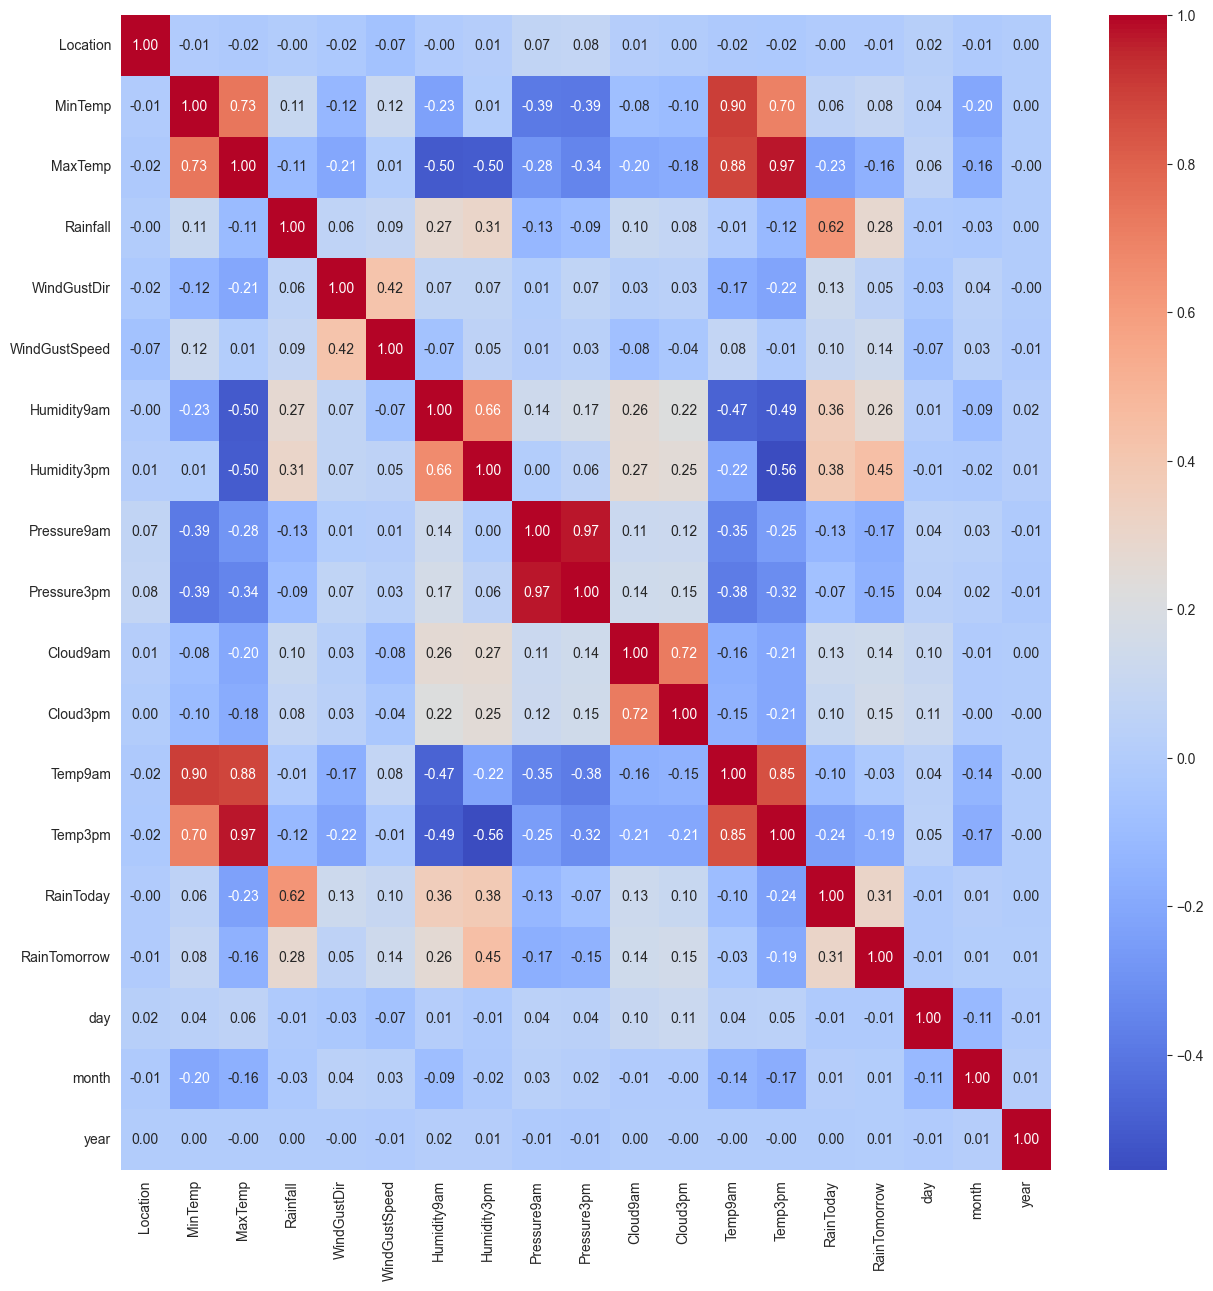

In [82]:
#creo la matrice di correlazione
matr_corr = df_imputed.corr()

#stampo la matrice di correlazione
plt.figure(figsize=(15,15))
sb.heatmap(matr_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Da una veloce analisi della matrice di correlazione possiamo notare come alcuni attributi sono bassamente correlati agli altri. Questo ci permette di dropparli senza problemi così da ridurre il numero di features da tenere in considerazione

In [83]:
df_imputed = df_imputed.drop(columns=['year', 'month', 'day', 'WindGustDir', 'WindGustSpeed', 'Location'])

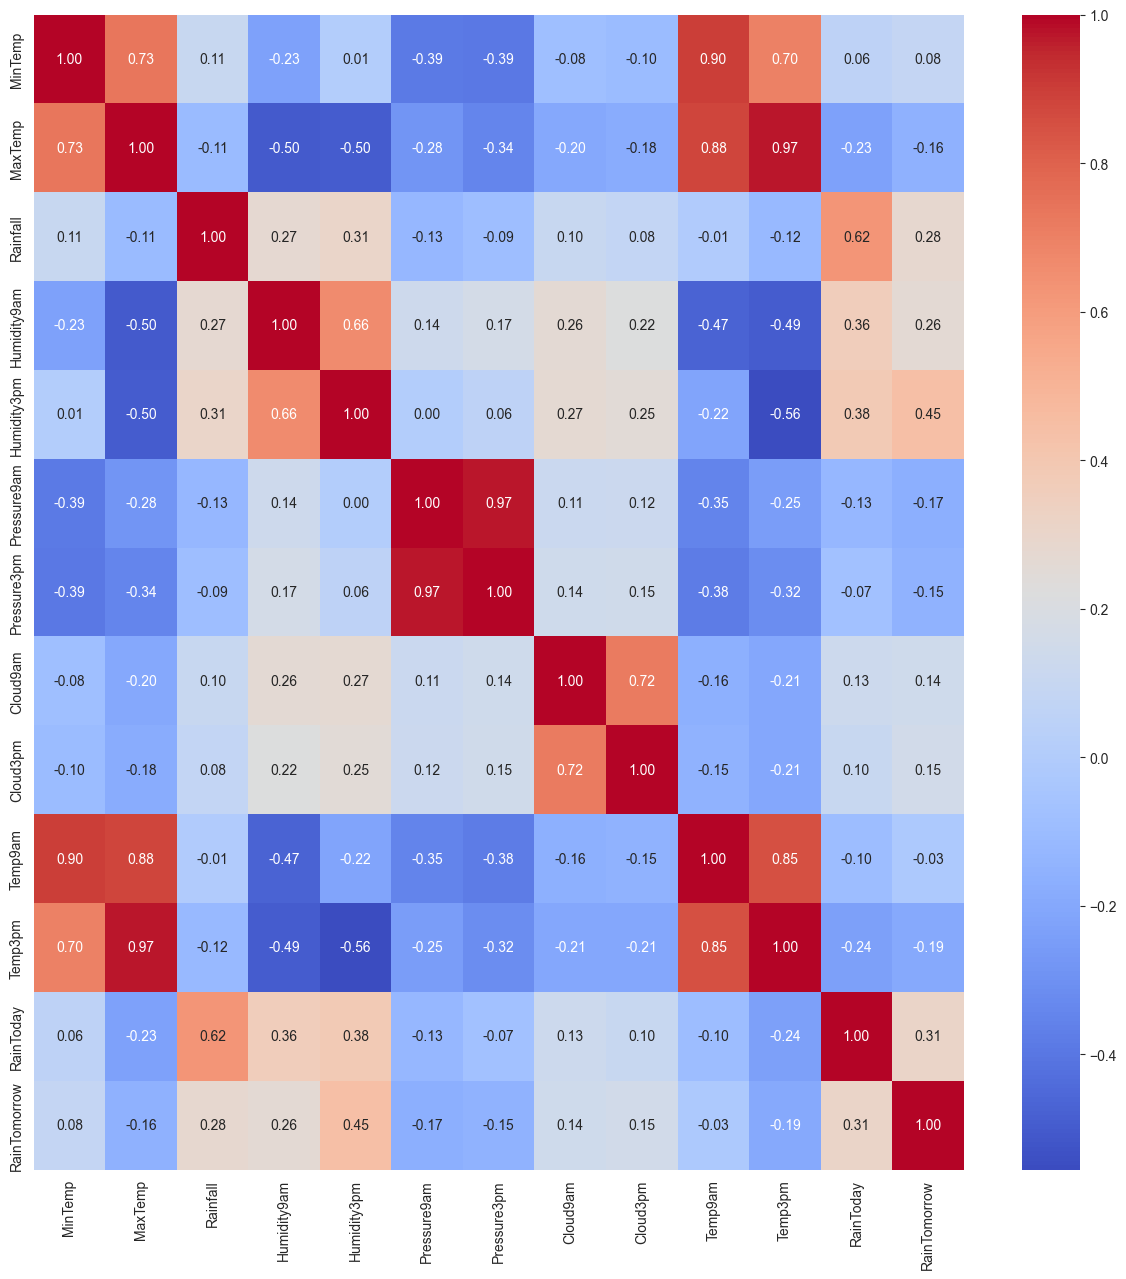

In [84]:
#creo la matrice di correlazione
matr_corr = df_imputed.corr()

#stampo la matrice di correlazione
plt.figure(figsize=(15,15))
sb.heatmap(matr_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Andiamo adesso a studiare l'importanza delle feature. Sappiamo di voler fare predizione sull'attributo 'RainTomorrow', andiamo quindi a creare un RandomForest che ci permetterà di capire quali sono gli attributi più importanti a riguardo.

In [ ]:
df_X = df_imputed.drop('RainTomorrow', axis=1)
df_y = df_imputed['RainTomorrow']

forest = RandomForestClassifier()
forest.fit(df_X, df_y)

attr = df_X.columns
importances = forest.feature_importances_ #grado di importanza delle features
index = np.argsort(importances) #mappa ogni grado di importanza con l'attributo corrispondente

plt.figure(figsize=(10,10))
plt.title('Grado di importanza fra gli attributi')
plt.barh(range(len(index)),importances[index],color='b',align='center')
plt.yticks(range(len(index)),attr[index])
plt.show()